In [16]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

#Comment out following if you don't have RiboGraphViz installed
from RiboGraphViz import RGV

from DegScore import DegScore

Populating the interactive namespace from numpy and matplotlib


In [17]:
data = pd.read_csv('example.20210618-144823-76459.RUNNING_BEST.txt',delimiter='\t')

In [18]:
# Quantities recorded by Ribotree during run

print(list(data.keys()))

['sequence', 'CAI', 'AUP', 'AUP_init14', 'MFE Structure', 'dG(MFE)', 'DegScore', 'MLD', 'c5prime', 'c3prime']


In [19]:
data.head()

,sequence,CAI,AUP,AUP_init14,MFE Structure,dG(MFE),DegScore,MLD,c5prime,c3prime
0,AUGGGCGGUUCCGGAGGCUCUGGUUACCAACCAUAUCGGGUGGUCG...,0.663017,0.423478,0.458466,....(((((..((((((....)))).))..)))))..............,-95.9,115.606,21,ACAUUUGCUUCUGACACAACUGUGUUCACUAGCAACCUCAAACAGA...,GCUCGCUUUCUUGCUGUCCAAUUUCUAUUAAAGGUUCCUUUGUUCC...
1,AUGGGCGGUUCCGGAGGCUCUGGUUACCAACCAUAUAGGGUGGUCG...,0.657136,0.392939,0.456960,....(((((..((((((....)))).))..)))))..............,-103.8,108.068,46,ACAUUUGCUUCUGACACAACUGUGUUCACUAGCAACCUCAAACAGA...,GCUCGCUUUCUUGCUGUCCAAUUUCUAUUAAAGGUUCCUUUGUUCC...
2,AUGGGCGGUUCCGGAGGCUCUGGUUACCAACCAUAUAGGGUGGUCG...,0.657136,0.392939,0.456960,....(((((..((((((....)))).))..)))))..............,-103.8,108.068,46,ACAUUUGCUUCUGACACAACUGUGUUCACUAGCAACCUCAAACAGA...,GCUCGCUUUCUUGCUGUCCAAUUUCUAUUAAAGGUUCCUUUGUUCC...
3,AUGGGCGGUUCCGGAGGCUCAGGUUACCAACCAUAUAGGGUGGUCG...,0.642180,0.396820,0.457036,....(((((..((((((....)))).))..)))))..............,-101.4,107.742,64,ACAUUUGCUUCUGACACAACUGUGUUCACUAGCAACCUCAAACAGA...,GCUCGCUUUCUUGCUGUCCAAUUUCUAUUAAAGGUUCCUUUGUUCC...
4,AUGGGCGGCUCCGGAGGCUCAGGCUACCAACCAUACAGGGUGGUGG...,0.731696,0.386245,0.457034,....(((((..((((((....)))).))..)))))..............,-110.9,106.490,52,ACAUUUGCUUCUGACACAACUGUGUUCACUAGCAACCUCAAACAGA...,GCUCGCUUUCUUGCUGUCCAAUUUCUAUUAAAGGUUCCUUUGUUCC...


Text(0.5, 0, 'Iteration')

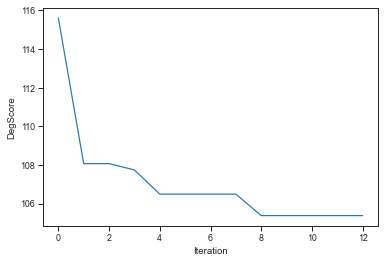

In [20]:
# Monitor decrease in degscore
plot(data.DegScore)
ylabel('DegScore')
xlabel('Iteration')

Text(0, 0.5, 'dG(MFE) (kcal/mol)')

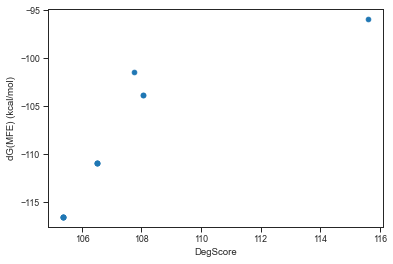

In [21]:
# compare quantities
scatter(data.DegScore, data['dG(MFE)'])
xlabel('DegScore')
ylabel('dG(MFE) (kcal/mol)')

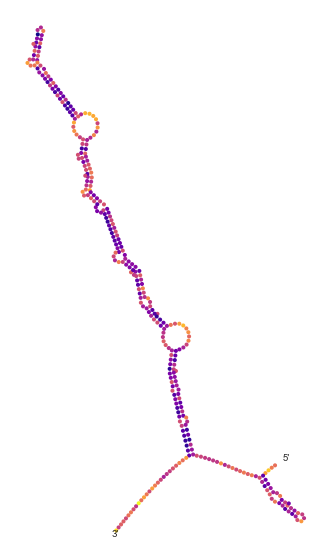

In [22]:
#visualize final structure with RiboGraphViz

sequence = data.iloc[-1]['c5prime']+data.iloc[-1]['sequence']+data.iloc[-1]['c3prime']
structure = data.iloc[-1]['MFE Structure']
rgv_object = RGV(structure)

# need to re-compute DegScore, as vector of predictions is not saved
mdl = DegScore(sequence, structure)
degscore_vector = mdl.degscore_by_position

figure(figsize=(10,10))
rgv_object.draw(c=degscore_vector)

savefig('example_DegScore_run.png',dpi=300, bbox_inches='tight')